# Klasifikasi harga telepon genggam

**Pengenalan Datasets**

Bob telah memulai perusahaan selulernya sendiri. Dia ingin memberikan persaingan ketat dengan perusahaan-perusahaan besar seperti Apple, Samsung, dll.

Dia tidak tahu bagaimana memperkirakan harga ponsel yang dibuat perusahaannya. Di pasar ponsel yang kompetitif ini, kita tidak bisa begitu saja mengasumsikan sesuatu. Untuk mengatasi masalah ini, dia mengumpulkan data penjualan ponsel dari berbagai perusahaan.

Bob ingin mengetahui hubungan antara fitur-fitur ponsel (misal: RAM, Memori Internal, dll) dan harga jualnya. Tetapi dia tidak begitu ahli dalam Machine Learning. Jadi dia membutuhkan bantuan dari kamu untuk menyelesaikan masalah ini.

Dalam masalah ini kamu tidak perlu memprediksi harga sebenarnya, melainkan kisaran harga yang menunjukkan seberapa tinggi harga tersebut.

Seperti yang sudah dijelaskan di atas, datasets berasal dari perusahaan yang dibangun oleh Bob dan di-download melalui kaggle pada [tautan berikut ini](https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url_data_train = 'https://raw.githubusercontent.com/Faridwm/Klasifikasi-Harga-Telepon-Genggam/master/Datasets/train.csv'
url_data_test = 'https://raw.githubusercontent.com/Faridwm/Klasifikasi-Harga-Telepon-Genggam/master/Datasets/test.csv'

In [3]:
data_train = pd.read_csv(url_data_train)
data_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


# EDA

### Data Profiling

Data akan diolah untuk melihat ukuran pusat data, nilai null, korelasi, dll.

In [4]:
print("Dimensi data sebesar {} baris dan {} kolom".format(data_train.shape[0], data_train.shape[1]))

Dimensi data sebesar 2000 baris dan 21 kolom


In [5]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [6]:
print('Jumlah data null/nan pada datasets sebanyak {} data'.format(data_train.isna().sum().sum()))

Jumlah data null/nan pada datasets sebanyak 0 data


In [7]:
data_train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


## Cleaning data

Tipe data pada beberapa kolom membutuhkan penyesuaian. Hal ini dilakukan karena data pada beberapa kolom pada datasets merupakan data numerik tapi tidak bertindak sebagai numerik karena tidak dapat dihitung rata-ratanya. Sehinggal kolom-kolom tersebut akan dikelompokkan menjadi data kategori. \

Kolom-kolom yang akan diubah menjadi tipe data kategori adalah: blue, dual_sim, four_g, n_cores, three_g, touch_screen, wifi, price_range

In [8]:
cat_column_names = ['blue', 'dual_sim', 'four_g', 'n_cores', 'three_g', 'touch_screen', 'wifi', 'price_range']

In [9]:
data_train[cat_column_names] = data_train[cat_column_names].astype('category')

In [10]:
# Informasi ringkas datasets setelah mengubah tipe data pada beberapa kolom tertentu
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   battery_power  2000 non-null   int64   
 1   blue           2000 non-null   category
 2   clock_speed    2000 non-null   float64 
 3   dual_sim       2000 non-null   category
 4   fc             2000 non-null   int64   
 5   four_g         2000 non-null   category
 6   int_memory     2000 non-null   int64   
 7   m_dep          2000 non-null   float64 
 8   mobile_wt      2000 non-null   int64   
 9   n_cores        2000 non-null   category
 10  pc             2000 non-null   int64   
 11  px_height      2000 non-null   int64   
 12  px_width       2000 non-null   int64   
 13  ram            2000 non-null   int64   
 14  sc_h           2000 non-null   int64   
 15  sc_w           2000 non-null   int64   
 16  talk_time      2000 non-null   int64   
 17  three_g        2000 non-null   ca

In [11]:
data_train.describe()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,1.522250,4.309500,32.046500,0.501750,140.249000,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000
std,439.418206,0.816004,4.341444,18.145715,0.288416,35.399655,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955
min,501.000000,0.500000,0.000000,2.000000,0.100000,80.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000
25%,851.750000,0.700000,1.000000,16.000000,0.200000,109.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000
50%,1226.000000,1.500000,3.000000,32.000000,0.500000,141.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000
75%,1615.250000,2.200000,7.000000,48.000000,0.800000,170.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000
max,1998.000000,3.000000,19.000000,64.000000,1.000000,200.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000


In [12]:
# ukuran pusat data pada data dengan tipe data kategori
data_train.describe(exclude='number')

,blue,dual_sim,four_g,n_cores,three_g,touch_screen,wifi,price_range
count,2000,2000,2000,2000,2000,2000,2000,2000
unique,2,2,2,8,2,2,2,4
top,0,1,1,4,1,1,1,0
freq,1010,1019,1043,274,1523,1006,1014,500


Pada datasets tidak ditemukan adanya missing values. Sementara pada hasil perhitungan ukuran data pusat, dapat dilihat pada kolom sc_w memiliki nilai minimum 0. Hal ini menjadi janggal dikarenakan kolom sc_w adalah kolom yang merepresentasikan lebar layar pada telepon genggam sehingga, tidak mungkin nilai dari kolom sc_w menjadi 0. Untuk mengatasi hal ini, maka baris dengan sc_w bernilai 0 akan dihapus.

In [13]:
# Hapus baris dengan sc_w = 0
data_train.drop(data_train[data_train['sc_w'] == 0].index, inplace=True)

In [14]:
print("Jumlah baris setelah menghapus baris dengan sc_w bernilai 0 berjumlah {} baris".format(data_train.shape[0]))

Jumlah baris setelah menghapus baris dengan sc_w bernilai 0 berjumlah 1820 baris


In [15]:
data_train.describe()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
count,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000
mean,1237.843956,1.519670,4.319231,32.139560,0.499890,140.585714,9.882418,646.731319,1252.686264,2133.372527,12.485714,6.337363,11.007143
std,439.940961,0.813829,4.354894,18.114542,0.288805,35.428886,6.007821,444.877537,432.342583,1087.197536,4.166849,4.152062,5.455951
min,501.000000,0.500000,0.000000,2.000000,0.100000,80.000000,0.000000,0.000000,500.000000,256.000000,5.000000,1.000000,2.000000
25%,845.500000,0.700000,1.000000,16.000000,0.200000,109.000000,5.000000,283.750000,877.000000,1203.750000,9.000000,3.000000,6.000000
50%,1230.500000,1.500000,3.000000,32.000000,0.500000,141.500000,10.000000,561.500000,1250.000000,2174.000000,13.000000,6.000000,11.000000
75%,1611.000000,2.200000,7.000000,48.000000,0.800000,170.250000,15.000000,952.000000,1633.000000,3072.250000,16.000000,9.000000,16.000000
max,1998.000000,3.000000,19.000000,64.000000,1.000000,200.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000


### Korelasi

In [16]:
corr = data_train.corr()

<ipython-input-16-10523e8f037e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data_train.corr()


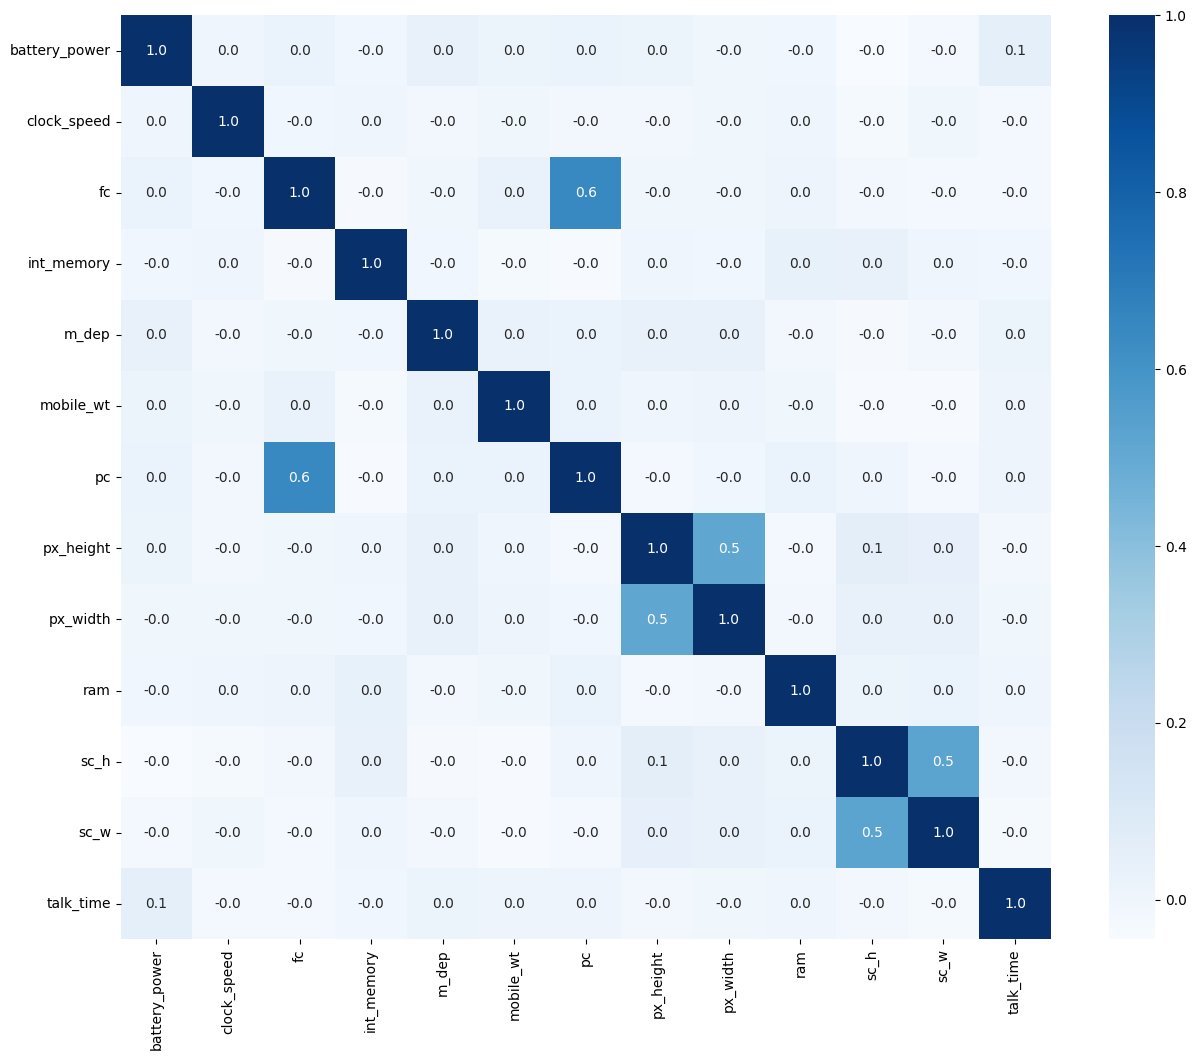

In [17]:
fig, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(corr, cmap='Blues', fmt='.1f', annot=True)
plt.show()

In [19]:
# corr['price_range'].sort_values(ascending=False)

Dapat kita lihat pada heatmap di atas, kolom price_range memiliki nilai kolasi positif yang sangat tinggi dan searah. Dalam hal ini dapat kita ketahui hubungan antar harga dari telepon genggam dengan kapasitas ram yang dimiliki memiliki hubungan yang sangat kuat. Selain itu kolom-kolom berikut juga memiliki korelasi dengan harga telepon genggam walaupun nilai korelasinya tidaklah cukup kuat. Kolom-kolom tersebut antara lain:
- Daya baterai
- Lebar dan Tinggi resolusi piksel
- Kapasitas internal memori

## Visualisasi data

In [20]:
price_range_cl = ['Very High Cost', 'High Cost', 'Medium Cost', 'Low Cost']

In [21]:
# membuat copy dari data train
data_viz = data_train.copy()

In [22]:
def price_class(data):
    if data == 0:
        return 'Low Cost'
    elif data == 1:
        return 'Medium Cost'
    elif data == 2:
        return 'High Cost'
    elif data == 3:
        return 'Very High Cost'
    else:
        return 'Unknown Cost'

In [23]:
data_viz['price_range'] = data_viz['price_range'].apply(lambda x: price_class(x))

In [24]:
data_viz['price_range'].value_counts()

Very High Cost    461
High Cost         456
Medium Cost       452
Low Cost          451
Name: price_range, dtype: int64

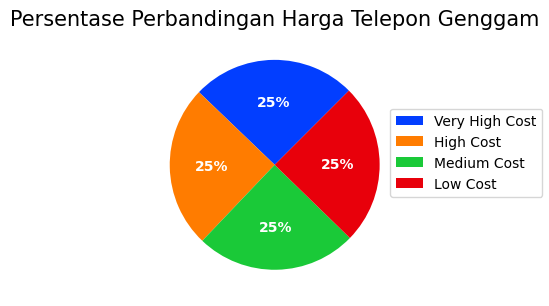

In [25]:
fig, ax = plt.subplots(figsize=(4, 4))
palette_color = sns.color_palette('bright')
# plotting data
ax.pie(data_viz['price_range'].value_counts(),
        labels=data_viz['price_range'].value_counts().index, colors=palette_color,
        autopct='%.0f%%', textprops={'color': 'w', 'fontsize':10, 'fontweight':'bold'},
       startangle=45)
plt.title("Persentase Perbandingan Harga Telepon Genggam", size=15)
fig.legend(loc='center right')
plt.tight_layout()
plt.show()

In [26]:
data_viz.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1820 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   battery_power  1820 non-null   int64   
 1   blue           1820 non-null   category
 2   clock_speed    1820 non-null   float64 
 3   dual_sim       1820 non-null   category
 4   fc             1820 non-null   int64   
 5   four_g         1820 non-null   category
 6   int_memory     1820 non-null   int64   
 7   m_dep          1820 non-null   float64 
 8   mobile_wt      1820 non-null   int64   
 9   n_cores        1820 non-null   category
 10  pc             1820 non-null   int64   
 11  px_height      1820 non-null   int64   
 12  px_width       1820 non-null   int64   
 13  ram            1820 non-null   int64   
 14  sc_h           1820 non-null   int64   
 15  sc_w           1820 non-null   int64   
 16  talk_time      1820 non-null   int64   
 17  three_g        1820 non-null   ca

In [27]:
# Mengambil data telepon genggam yang memiliki koneksi internet
inet_conn = data_viz.loc[:, ['four_g', 'three_g', 'wifi', 'price_range']]

In [28]:
# Hitung telepon genggam yang masing masing memiliki konksi 3G, 4G dan WiFi
inet_conn_cnt = {
    'Hanya 3G' : inet_conn[(inet_conn['three_g'] == 1) & (inet_conn['four_g'] == 0) & (inet_conn['wifi'] == 0)]['price_range'].value_counts().reindex(price_range_cl),
    '3G & wifi' : inet_conn[(inet_conn['three_g'] == 1) & (inet_conn['four_g'] == 0) & (inet_conn['wifi'] == 1)]['price_range'].value_counts().reindex(price_range_cl),
    '3G & 4G' : inet_conn[(inet_conn['four_g'] == 1) & (inet_conn['wifi'] == 0)]['price_range'].value_counts().reindex(price_range_cl),
    '3G, 4G & wifi' : inet_conn[(inet_conn['four_g'] == 1) & (inet_conn['wifi'] == 1)]['price_range'].value_counts().reindex(price_range_cl),
    'Hanya wifi' : inet_conn[(inet_conn['three_g'] == 0) & (inet_conn['four_g'] == 0) & (inet_conn['wifi'] == 1)]['price_range'].value_counts().reindex(price_range_cl),
}

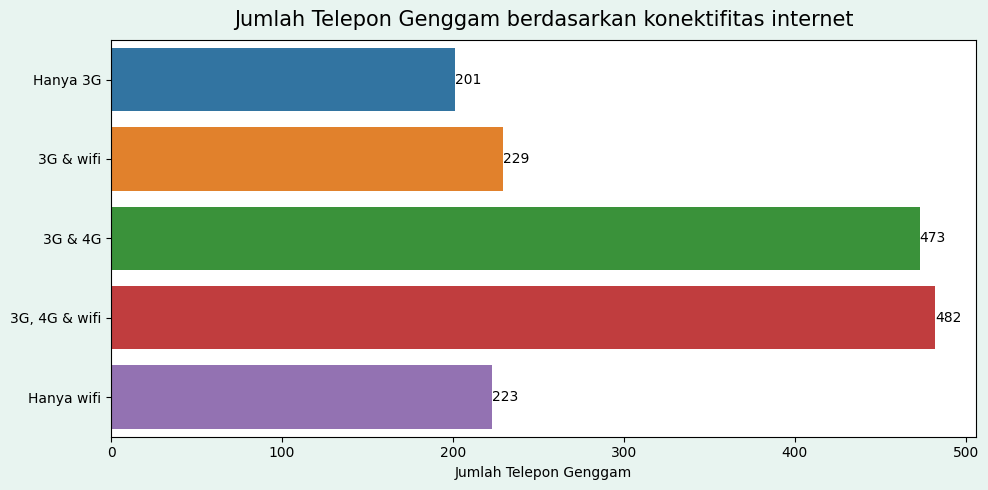

In [29]:
fig, ax = plt.subplots(figsize=(10, 5), facecolor='#e8f4f0')
sns.barplot(y=list(inet_conn_cnt.keys()),
            x=[x.sum() for x in inet_conn_cnt.values()])
for i in ax.containers:
    ax.bar_label(i,)
plt.xlabel("Jumlah Telepon Genggam")
plt.title("Jumlah Telepon Genggam berdasarkan konektifitas internet", size=15, pad=10)
plt.tight_layout()
plt.show()

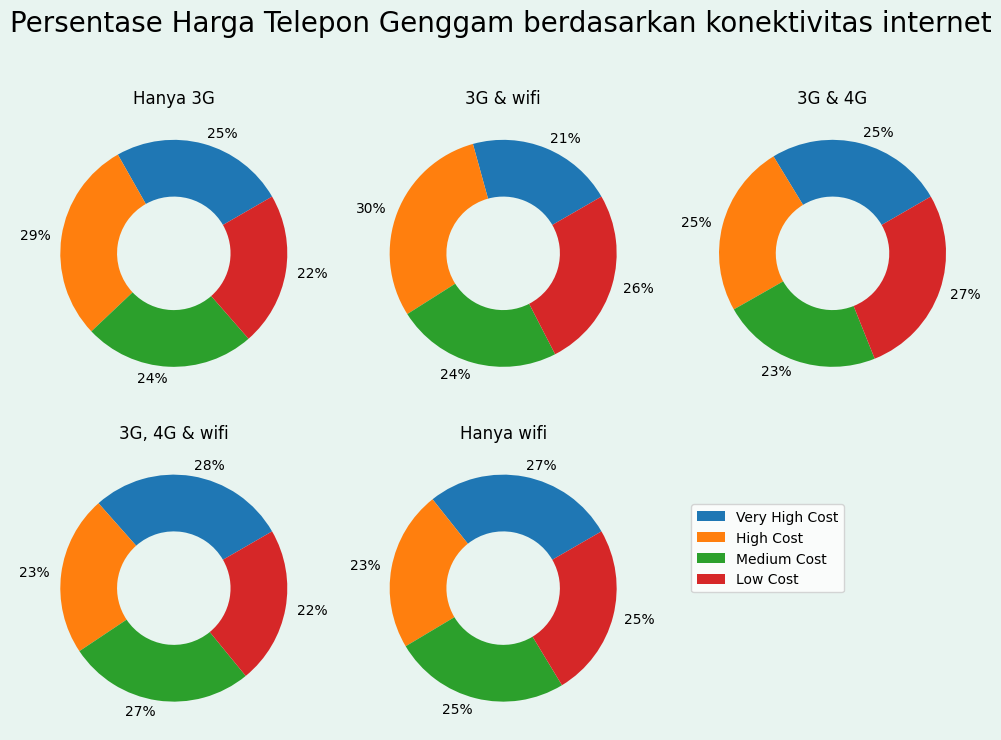

In [30]:
fig, axs = plt.subplots(2, 3, figsize=(10, 10), facecolor='#e8f4f0')
fig.delaxes(axs[1, 2])
for i, (k, v) in enumerate(inet_conn_cnt.items()):
    ax = axs[i // 3, i % 3]
    ax.pie(v,
           labels= ['{:.0f}%'.format(np.round(x/v.values.sum()*100)) for x in v.values],
           wedgeprops={'width':.5},
#            autopct='%.0f%%',
           textprops={'fontsize':10},
           startangle=30)
    ax.set_title(k)

fig.legend([x for x in price_range_cl],
                    # Legend position
                    bbox_to_anchor=(0.85, 0.3),
                    loc='lower right',
                    fancybox=True)
fig.suptitle('Persentase Harga Telepon Genggam berdasarkan konektivitas internet', y=.89, fontsize=20)
plt.subplots_adjust(top=2, bottom=0.3)
plt.tight_layout()
plt.show()

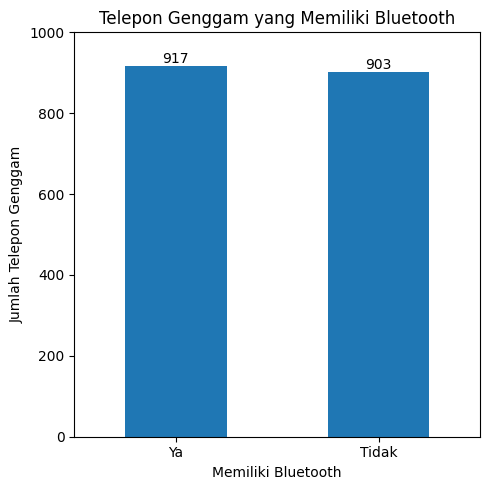

In [31]:
fig, ax = plt.subplots(figsize=(5,5))
data_viz['blue'].value_counts().plot(kind='bar', ax=ax)
for i in ax.containers:
    ax.bar_label(i,)
plt.ylim(0, 1000)
labs, locs = plt.xticks()
plt.xticks(labs, ['Ya', 'Tidak'], rotation=0)
plt.xlabel('Memiliki Bluetooth')
plt.ylabel("Jumlah Telepon Genggam")
plt.title("Telepon Genggam yang Memiliki Bluetooth")
plt.tight_layout()
plt.show()

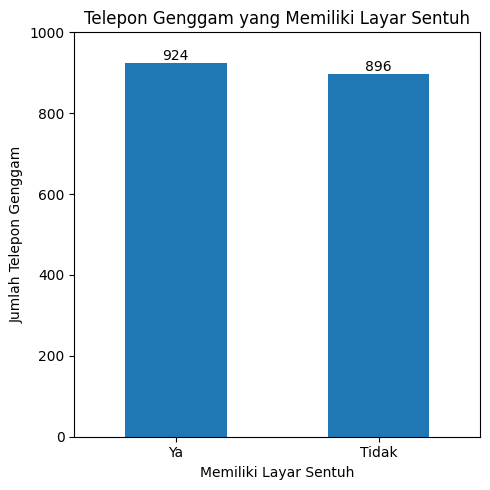

In [32]:
fig, ax = plt.subplots(figsize=(5,5))
data_viz['touch_screen'].value_counts().plot(kind='bar', ax=ax)
for i in ax.containers:
    ax.bar_label(i,)
plt.ylim(0, 1000)
labs, locs = plt.xticks()
plt.xticks(labs, ['Ya', 'Tidak'], rotation=0)
plt.xlabel('Memiliki Layar Sentuh')
plt.ylabel("Jumlah Telepon Genggam")
plt.title("Telepon Genggam yang Memiliki Layar Sentuh")
plt.tight_layout()
plt.show()

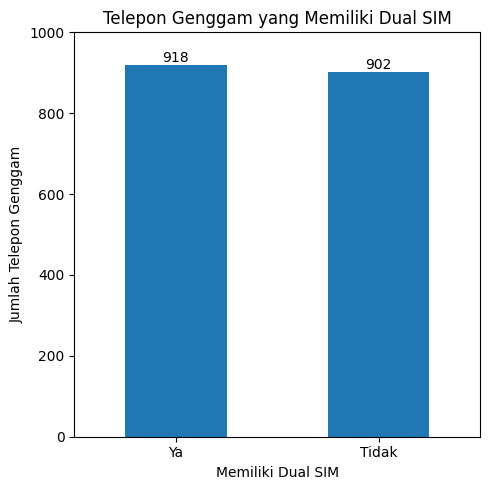

In [33]:
fig, ax = plt.subplots(figsize=(5,5))
data_viz['dual_sim'].value_counts().plot(kind='bar', ax=ax)
for i in ax.containers:
    ax.bar_label(i,)
plt.ylim(0, 1000)
labs, locs = plt.xticks()
plt.xticks(labs, ['Ya', 'Tidak'], rotation=0)
plt.xlabel('Memiliki Dual SIM')
plt.ylabel("Jumlah Telepon Genggam")
plt.title("Telepon Genggam yang Memiliki Dual SIM")
plt.tight_layout()
plt.show()

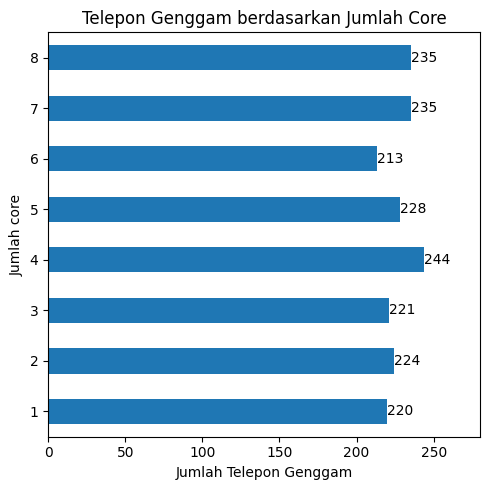

In [34]:
fig, ax = plt.subplots(figsize=(5,5))
data_viz['n_cores'].value_counts().sort_index().plot(kind='barh', ax=ax)
for i in ax.containers:
    ax.bar_label(i,)

labs, locs = plt.xticks()
plt.xlim(0, 280)
plt.xticks(rotation=0)
plt.xlabel("Jumlah Telepon Genggam")
plt.ylabel("Jumlah core")
plt.title("Telepon Genggam berdasarkan Jumlah Core")
plt.tight_layout()
plt.show()

In [35]:
clk_spd_cores = data_viz.groupby(by='n_cores')['clock_speed'].agg(['mean', 'median', 'std'])
clk_spd_cores['percentile90'] = data_viz.groupby(by='n_cores')['clock_speed'].quantile(0.90)
clk_spd_cores =  np.round(clk_spd_cores, 2)

In [36]:
clk_spd_cores

,mean,median,std,percentile90
n_cores,,,,
1,1.61,1.60,0.81,2.71
2,1.46,1.35,0.83,2.70
3,1.57,1.60,0.81,2.80
4,1.54,1.50,0.83,2.70
5,1.39,1.30,0.80,2.50
6,1.53,1.50,0.83,2.68
7,1.58,1.60,0.78,2.60
8,1.49,1.40,0.81,2.70


<Axes: xlabel='n_cores', ylabel='ram'>

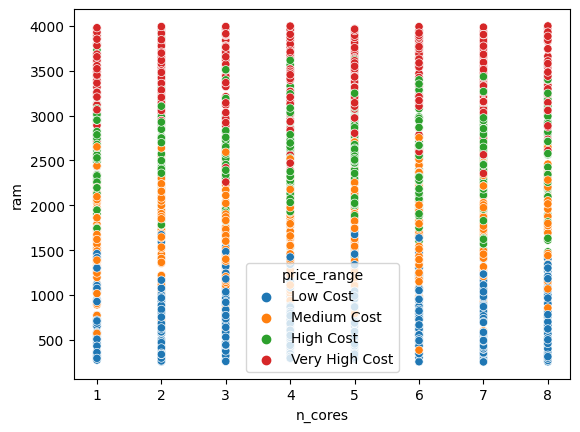

In [37]:
sns.scatterplot(data=data_viz, x='n_cores', y='ram', hue='price_range')

In [38]:
from scipy.stats import norm

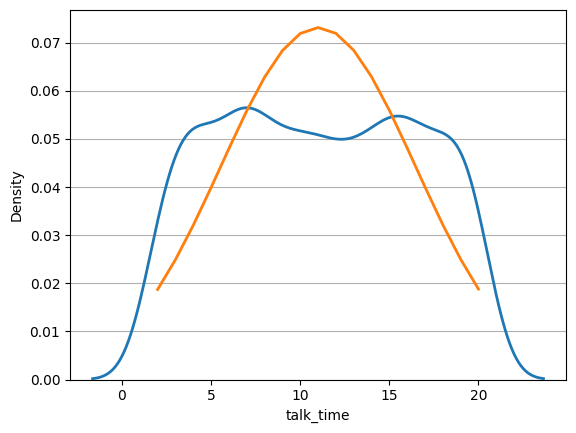

In [39]:
pdf_talktime = norm.pdf(data_viz['talk_time'], loc=data_viz['talk_time'].mean(), scale=data_viz['talk_time'].std())
sns.kdeplot(data=data_viz, x='talk_time', lw=2)
sns.lineplot(x=data_viz['talk_time'], y=pdf_talktime, lw=2)
plt.grid(axis='y')
plt.show()

In [40]:
pdf_talktime

array([0.02500378, 0.05583488, 0.06833632, ..., 0.03988423, 0.02500378,
       0.01871641])

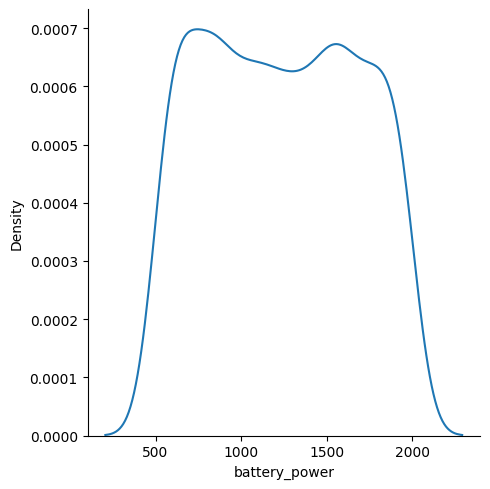

In [41]:
sns.displot(data=data_viz, x='battery_power', kind='kde')

# Model Machine Learning

In [42]:
# Load test data
data_test = pd.read_csv(url_data_test)
data_test.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [43]:
print(data_train.shape, data_test.shape)

(1820, 21) (1000, 21)


In [44]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1820 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   battery_power  1820 non-null   int64   
 1   blue           1820 non-null   category
 2   clock_speed    1820 non-null   float64 
 3   dual_sim       1820 non-null   category
 4   fc             1820 non-null   int64   
 5   four_g         1820 non-null   category
 6   int_memory     1820 non-null   int64   
 7   m_dep          1820 non-null   float64 
 8   mobile_wt      1820 non-null   int64   
 9   n_cores        1820 non-null   category
 10  pc             1820 non-null   int64   
 11  px_height      1820 non-null   int64   
 12  px_width       1820 non-null   int64   
 13  ram            1820 non-null   int64   
 14  sc_h           1820 non-null   int64   
 15  sc_w           1820 non-null   int64   
 16  talk_time      1820 non-null   int64   
 17  three_g        1820 non-null   ca

In [45]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

In [46]:
# drop colomn id
data_test.drop(['id'], axis=1, inplace=True)

In [47]:
data_test.shape

(1000, 20)

In [48]:
# konversi kolom-kolom yang bersifat kategori
data_test[cat_column_names[:-1]] = data_test[cat_column_names[:-1]].astype('category')

In [49]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   battery_power  1000 non-null   int64   
 1   blue           1000 non-null   category
 2   clock_speed    1000 non-null   float64 
 3   dual_sim       1000 non-null   category
 4   fc             1000 non-null   int64   
 5   four_g         1000 non-null   category
 6   int_memory     1000 non-null   int64   
 7   m_dep          1000 non-null   float64 
 8   mobile_wt      1000 non-null   int64   
 9   n_cores        1000 non-null   category
 10  pc             1000 non-null   int64   
 11  px_height      1000 non-null   int64   
 12  px_width       1000 non-null   int64   
 13  ram            1000 non-null   int64   
 14  sc_h           1000 non-null   int64   
 15  sc_w           1000 non-null   int64   
 16  talk_time      1000 non-null   int64   
 17  three_g        1000 non-null   cat

In [50]:
data_test.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

Data test ini akan bertindak sebagai data baru, sehingga kita akan membuat model ML untuk menentukan harga pada data test ini.

## Split

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X, y= data_train.loc[:, ~data_train.columns.isin(['price_range'])], data_train['price_range']

In [53]:
print("""Jumlah baris dan kolom pada X sebesar {} baris dan {} kolom\nSementara jumlah baris pada y sebesar {} baris""".format(X.shape[0], X.shape[1], y.shape[0]))

Jumlah baris dan kolom pada X sebesar 1820 baris dan 20 kolom
Sementara jumlah baris pada y sebesar 1820 baris


In [54]:
# split train dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
print("Ukuran data X latih sebesar {} dan y latih sebesar {}".format(X_train.shape, y_train.shape))
print("Ukuran data X tes sebesar {} dan y tes sebesar {}".format(X_test.shape, y_test.shape))

Ukuran data X latih sebesar (1456, 20) dan y latih sebesar (1456,)
Ukuran data X tes sebesar (364, 20) dan y tes sebesar (364,)


## Pipeline

In [56]:
# from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, LabelEncoder
from imblearn.over_sampling import SMOTE

# algortima ml
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import confusion_matrix, classification_report

In [57]:
cols_trans = ColumnTransformer([
    ('scaler', MinMaxScaler(), make_column_selector(dtype_include=np.number)),
    ('n_cores', OneHotEncoder(handle_unknown='ignore'), ['n_cores'])
], remainder='passthrough')

In [58]:
# buat pipeline dengan algortima yang berbeda
rfc_pipeline = Pipeline([
    ('preprocess', cols_trans),
    ('clf', RandomForestClassifier(random_state=42))
    ])

dct_pipeline = Pipeline([
    ('preprocess', cols_trans),
    ('clf', DecisionTreeClassifier(random_state=42))
    ])

svc_pipeline = Pipeline([
    ('preprocess', cols_trans),
    ('clf', SVC(random_state=42))
    ])

gnb_pipeline = Pipeline([
    ('preprocess', cols_trans),
    ('clf', GaussianNB())
    ])

model_pipelines = [rfc_pipeline, dct_pipeline, svc_pipeline, gnb_pipeline]

In [59]:
for pipe in model_pipelines:
    pipe.fit(X_train, y_train)
    print("Accuracy Score :", pipe.score(X_test, y_test))
    pipe.steps.insert(1, ['over-sampling', SMOTE(random_state=42)])
    pipe.fit(X_train, y_train)
    print("Accuracy Score after SMOTE :", pipe.score(X_test, y_test))
    print()

Accuracy Score : 0.8543956043956044
Accuracy Score after SMOTE : 0.8516483516483516

Accuracy Score : 0.8214285714285714
Accuracy Score after SMOTE : 0.8351648351648352

Accuracy Score : 0.8543956043956044
Accuracy Score after SMOTE : 0.8516483516483516

Accuracy Score : 0.7554945054945055
Accuracy Score after SMOTE : 0.75



In [60]:
rfc_pipeline

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', MinMaxScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x78365212f730>),
                                                 ('n_cores',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['n_cores'])])),
                ('over-sampling', SMOTE(random_state=42)),
                ('clf', RandomForestClassifier(random_state=42))])

In [61]:
print(classification_report(y_test, rfc_pipeline.predict(X_test)))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91        84
           1       0.88      0.72      0.79       102
           2       0.80      0.80      0.80        96
           3       0.86      0.98      0.91        82

    accuracy                           0.85       364
   macro avg       0.85      0.86      0.85       364
weighted avg       0.85      0.85      0.85       364



In [62]:
# Belajar custom class untuk steps pada pipeline
class norm_data(BaseEstimator, TransformerMixin):
    def __init__(self, cat_feature_name):
        self.cat_feature_name = cat_feature_name
    def fit(self, X, y=None):
        from sklearn.preprocessing import MinMaxScaler
        X_ = X.copy() #Buat copy dari X untuk menghindari perubahan pada dataset asli
        scaler = MinMaxScaler()
        X_scaler = scaler.fit(X_.loc[:, ~X_.columns.isin(self.cat_feature_name)])
        self.X_scaler = X_scaler
        return self
    def transform(self, X, y=None):
        X_ = X.copy()
        X_.loc[:, ~X.columns.isin(self.cat_feature_name)] = self.X_scaler.transform(X_.loc[:, ~X.columns.isin(self.cat_feature_name)])
        return X_